In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from xgboost import plot_importance, XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from time import time
import umap
import seaborn as sns

In [25]:
X = np.load('X.npy')
Y = np.load('Y.npy')

### Modèle de convolution avec Keras

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

In [27]:
X_train = X_train.reshape((1443, 64, 64, -1))
X_valid = X_valid.reshape((619, 64, 64, -1))
print(X_train.shape)
print(y_train.shape)

(1443, 64, 64, 1)
(1443, 10)


In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling1D
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

# Normalize the images.
#X_train = (X_train / 255) - 0.5
#X_valid = (X_valid / 255) - 0.5

# Reshape the images.
#X_train = np.expand_dims(X_train, axis=3)
#X_valid = np.expand_dims(X_valid, axis=3)


# Build the model.
model = Sequential([
  Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),

  Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
    
  Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
  
  Conv2D(32, (1,1), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Dropout(0.4),  
    
  Flatten(),
  Dense(10, activation='softmax'),  
    
])

# Compile the model.
learning_rate = 0.01
model.compile(
  'RMSprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  #optimizer=SGD(lr=learning_rate)
)

#callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)]

# Train the model.
history = model.fit(
  X_train,
  y_train,
  epochs=50,
  #callbacks=callbacks,
  validation_data=(X_valid, y_valid),
)

Train on 1443 samples, validate on 619 samples
Epoch 1/50
1443/1443 [==============================] - 5s 4ms/step - loss: 2.3172 - accuracy: 0.1074 - val_loss: 2.2591 - val_accuracy: 0.2084
Epoch 2/50
1443/1443 [==============================] - 5s 3ms/step - loss: 1.9386 - accuracy: 0.3174 - val_loss: 1.2799 - val_accuracy: 0.5670
Epoch 3/50
1443/1443 [==============================] - 4s 3ms/step - loss: 1.3364 - accuracy: 0.5336 - val_loss: 0.9476 - val_accuracy: 0.6963
Epoch 4/50
1443/1443 [==============================] - 4s 3ms/step - loss: 1.1385 - accuracy: 0.6202 - val_loss: 0.8629 - val_accuracy: 0.7027
Epoch 5/50
1443/1443 [==============================] - 5s 3ms/step - loss: 0.9951 - accuracy: 0.6715 - val_loss: 0.8236 - val_accuracy: 0.7221
Epoch 6/50
1443/1443 [==============================] - 5s 3ms/step - loss: 0.9077 - accuracy: 0.6805 - val_loss: 0.6350 - val_accuracy: 0.8029
Epoch 7/50
1443/1443 [==============================] - 4s 3ms/step - loss: 0.8157 - accu

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 8)         80        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 60, 60, 8)         584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)       

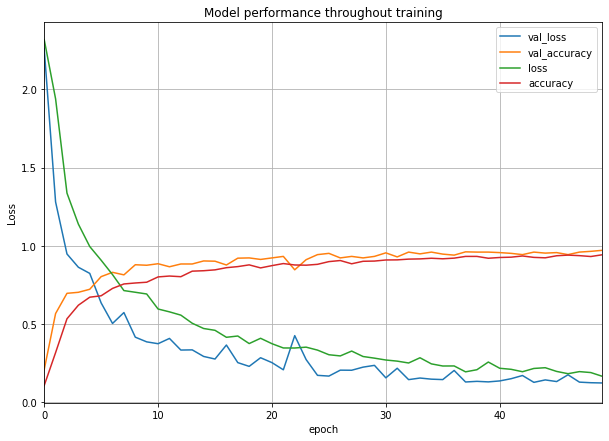

In [30]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [31]:
Y_predict = model.predict_classes(X_valid)

In [32]:
Y_predict

array([6, 9, 3, 9, 0, 5, 8, 2, 5, 9, 4, 9, 7, 1, 3, 3, 0, 5, 0, 7, 0, 8,
       3, 6, 9, 2, 7, 3, 5, 9, 8, 5, 4, 6, 4, 6, 3, 1, 9, 2, 7, 7, 3, 1,
       1, 2, 0, 7, 8, 9, 1, 9, 6, 2, 1, 0, 6, 8, 2, 8, 8, 7, 2, 7, 5, 9,
       2, 3, 6, 4, 1, 1, 5, 7, 4, 9, 9, 4, 3, 8, 8, 9, 2, 0, 9, 0, 0, 4,
       1, 4, 5, 4, 7, 4, 7, 4, 2, 2, 8, 7, 2, 0, 9, 0, 2, 1, 7, 8, 8, 7,
       2, 8, 3, 3, 2, 2, 6, 1, 5, 5, 5, 0, 1, 5, 8, 2, 6, 5, 1, 0, 3, 1,
       9, 9, 8, 8, 8, 9, 2, 2, 2, 6, 2, 6, 6, 1, 6, 2, 5, 4, 9, 2, 1, 2,
       6, 2, 6, 6, 1, 1, 7, 5, 9, 8, 6, 2, 4, 7, 6, 9, 8, 7, 2, 9, 1, 6,
       7, 6, 0, 6, 1, 7, 4, 8, 1, 3, 2, 2, 4, 2, 8, 6, 8, 3, 2, 0, 8, 8,
       8, 5, 4, 7, 0, 8, 2, 4, 2, 5, 2, 8, 9, 0, 2, 8, 5, 3, 4, 3, 5, 0,
       6, 4, 6, 1, 7, 5, 4, 1, 9, 5, 8, 4, 7, 6, 2, 1, 5, 4, 6, 4, 9, 6,
       1, 0, 9, 0, 1, 2, 3, 9, 5, 4, 2, 0, 0, 8, 2, 5, 9, 2, 4, 7, 9, 8,
       3, 7, 3, 7, 7, 1, 1, 1, 8, 9, 5, 7, 7, 3, 1, 7, 5, 3, 6, 9, 1, 9,
       2, 9, 8, 3, 0, 7, 0, 8, 0, 6, 5, 2, 1, 0, 0,

In [33]:
y_valid_flat = [list(y).index(1) for y in y_valid]
y_valid_flat

[6,
 9,
 3,
 9,
 0,
 5,
 8,
 2,
 5,
 9,
 4,
 9,
 7,
 1,
 3,
 3,
 0,
 5,
 0,
 7,
 0,
 8,
 3,
 6,
 9,
 2,
 7,
 3,
 5,
 9,
 8,
 5,
 4,
 6,
 4,
 6,
 3,
 1,
 9,
 2,
 7,
 7,
 3,
 1,
 1,
 2,
 0,
 7,
 8,
 9,
 1,
 9,
 6,
 2,
 1,
 0,
 6,
 8,
 2,
 8,
 8,
 7,
 2,
 7,
 5,
 9,
 2,
 3,
 6,
 4,
 1,
 1,
 5,
 7,
 4,
 9,
 9,
 4,
 3,
 8,
 8,
 9,
 2,
 0,
 9,
 0,
 0,
 4,
 1,
 5,
 5,
 4,
 7,
 4,
 7,
 4,
 2,
 2,
 8,
 7,
 2,
 0,
 9,
 0,
 2,
 1,
 7,
 8,
 8,
 7,
 2,
 8,
 3,
 3,
 2,
 2,
 6,
 1,
 5,
 5,
 5,
 0,
 1,
 5,
 8,
 2,
 6,
 5,
 1,
 0,
 3,
 1,
 9,
 9,
 8,
 3,
 8,
 9,
 2,
 2,
 2,
 6,
 2,
 6,
 6,
 1,
 6,
 2,
 5,
 4,
 9,
 2,
 1,
 2,
 6,
 2,
 6,
 6,
 1,
 1,
 7,
 5,
 9,
 8,
 6,
 2,
 4,
 7,
 6,
 9,
 8,
 7,
 2,
 9,
 1,
 6,
 7,
 6,
 0,
 6,
 1,
 7,
 4,
 8,
 4,
 3,
 2,
 2,
 4,
 2,
 8,
 6,
 8,
 3,
 2,
 0,
 8,
 8,
 8,
 5,
 4,
 7,
 0,
 8,
 2,
 4,
 2,
 5,
 5,
 8,
 9,
 0,
 2,
 8,
 5,
 3,
 1,
 3,
 5,
 0,
 6,
 4,
 6,
 1,
 7,
 5,
 4,
 1,
 9,
 5,
 8,
 4,
 7,
 6,
 3,
 1,
 5,
 4,
 6,
 4,
 9,
 6,
 1,
 0,
 9,
 0,
 1,
 2,
 3,
 9,


In [34]:
conf_mat = confusion_matrix(list(y_valid_flat), Y_predict)
conf_mat

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 69,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 73,  1,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  2, 59,  1,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 50,  0,  0,  0,  1,  0],
       [ 0,  0,  5,  0,  1, 49,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 63,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 62,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 60,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 61]], dtype=int64)

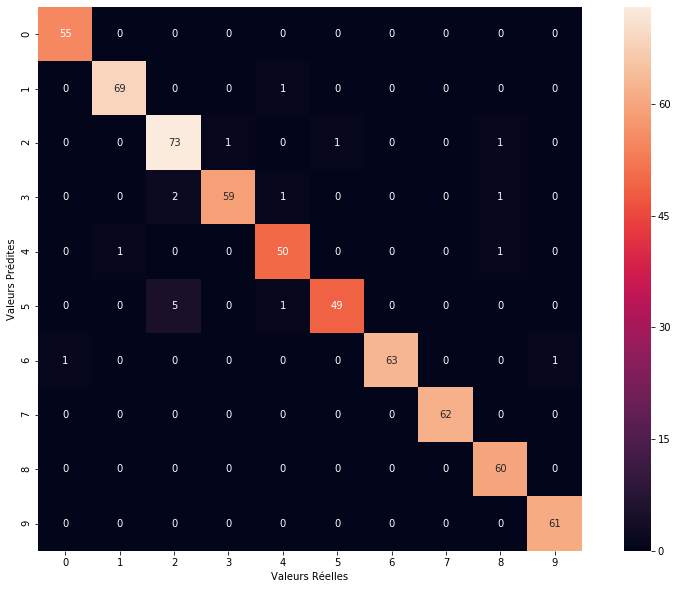

In [35]:
%matplotlib inline

plt.figure(figsize=(15,10))

ax = sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f', xticklabels=True)

ax.set_ylabel('Valeurs Prédites')
ax.set_xlabel('Valeurs Réelles')

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [36]:
accuracy = accuracy_score(y_valid_flat, Y_predict)
print(accuracy)

0.9709208400646203


In [37]:
predict_ok = []
true = 0
false = 0
for i in range(len(Y_predict)):
    if Y_predict[i] == y_valid_flat[i]:
        p = True 
        true += 1    
    else:
        p = False
        false += 1
    predict_ok.append(p)
                
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 601
Nombres de mauvaise prédictions : 18


In [38]:
df = pd.DataFrame(conf_mat, range(10),
                  range(10))
df.rename_axis('Prédites').rename_axis('Réelles', axis='columns')

Réelles,0,1,2,3,4,5,6,7,8,9
Prédites,,,,,,,,,,
0,55,0,0,0,0,0,0,0,0,0
1,0,69,0,0,1,0,0,0,0,0
2,0,0,73,1,0,1,0,0,1,0
3,0,0,2,59,1,0,0,0,1,0
4,0,1,0,0,50,0,0,0,1,0
5,0,0,5,0,1,49,0,0,0,0
6,1,0,0,0,0,0,63,0,0,1
7,0,0,0,0,0,0,0,62,0,0
8,0,0,0,0,0,0,0,0,60,0


In [ ]:
# faire un k-fold pour vérifier sur plusieurs split la variance
# diminuer le nombre de paramètre